# **Data Visualization**

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('Flipkart_cleaned_mobile_data_reviews_with_textblob_sentiment_analysis.csv')

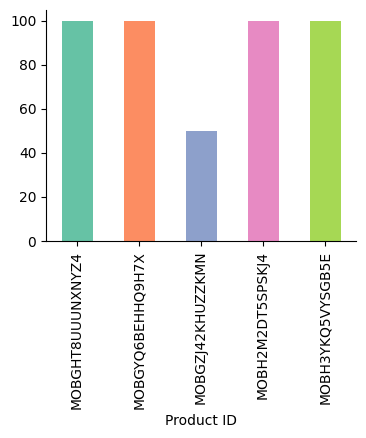

In [ ]:
#Bar chart for product ID
plt.figure(figsize=(4, 3))
df.groupby('Product ID').size().plot(kind="bar", color=sns.palettes.mpl_palette('Set2', 8))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 400x300 with 0 Axes>

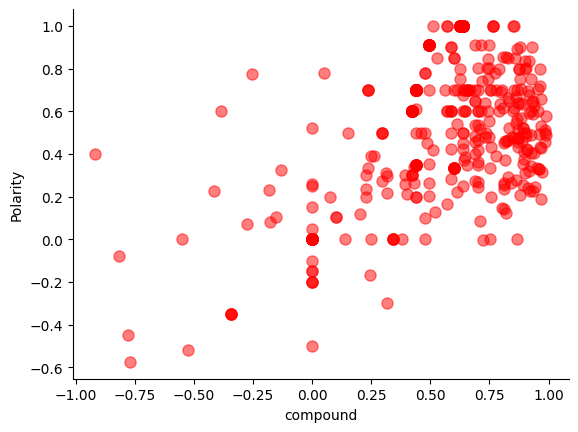

In [ ]:
# compound vs Polarity

plt.figure(figsize=(4, 3))
df.plot(kind='scatter', x='compound', y='Polarity', s=64, alpha=0.5, color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-7acefb3cbcdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='Set1')


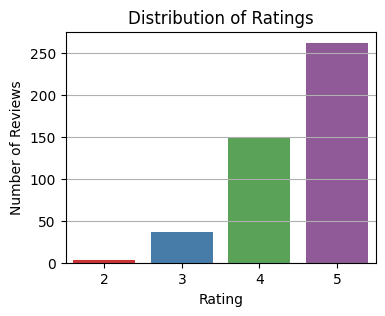

In [ ]:
# Plot Rating Distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Rating', data=df, palette='Set1')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', rotation=0)
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

<ipython-input-48-03ad52d2069c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compound', data=df, palette='pastel', order=df['compound'].value_counts().iloc[:10].index)    # df['compound'].value_counts().iloc[:10].plot(kind='bar')


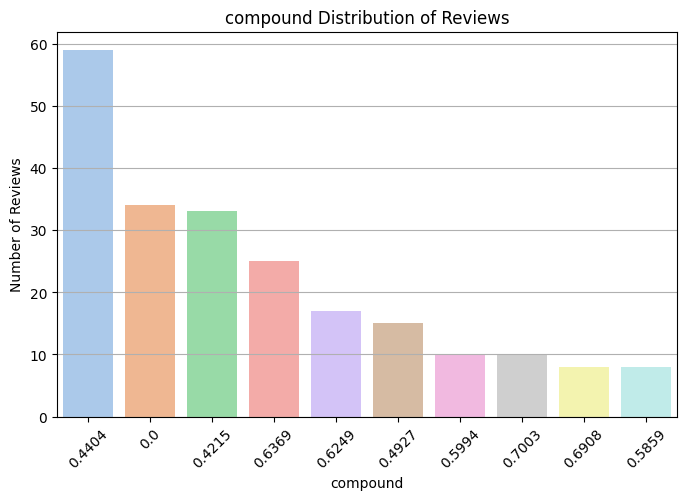

In [ ]:
# Visualization of compound Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='compound', data=df, palette='pastel', order=df['compound'].value_counts().iloc[:10].index)    # df['compound'].value_counts().iloc[:10].plot(kind='bar')
plt.title('compound Distribution of Reviews')
plt.xlabel('compound')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

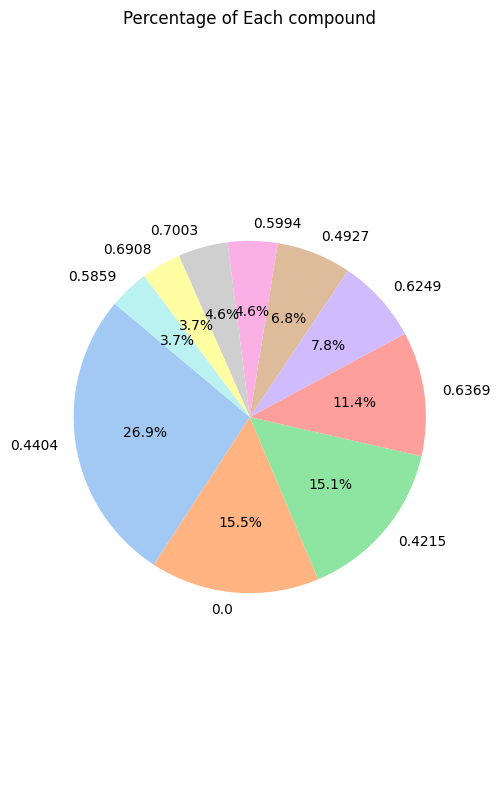

In [ ]:
# Additional visualization: Percentage of each compound
compound_counts = df['compound'].value_counts().iloc[:10]  # Select top 10 compounds
plt.figure(figsize=(5,10))
plt.pie(compound_counts, labels=compound_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')) # Remove 'order' parameter
plt.title('Percentage of Each compound')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

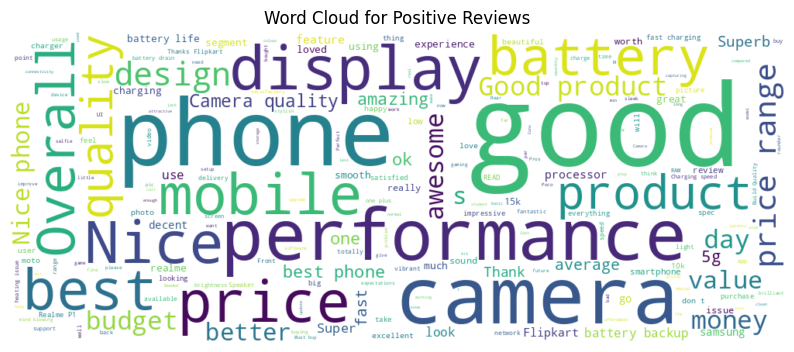

In [ ]:
# Word Cloud for Positive Reviews

# Example code for generating a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Cleaned_Reviews' column contains the text data of positive reviews
positive_reviews = df[df['compound'] > 0]['Review Text'].str.cat(sep=' ')  # Combine all positive reviews into one text

# Create a word cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(positive_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Positive Reviews')
plt.show()

# **Implementing LangChain for Product Recommendations [LLM]**

In [ ]:
!pip install langchain_community
from langchain import PromptTemplate
from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [ ]:
df.head()

,Product_name,Product ID,Review Text,Rating,Reviews_token,Sentiment_Score,compound,vader_lexicon_Sentiment,Polarity,TextBlob_Sentiment
0,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Osm camera,4,"['osm', 'camera']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.000000,Neutral
1,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Over All awesome,5,['awesome'],"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",0.6249,Positive,1.000000,Positive
2,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Good Samsung Galaxy A14 5g Dark Red 6 128 ...,5,"['good', 'samsung', 'galaxy', 'a14', '5g', 'da...","{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.7579,Positive,0.195833,Positive
3,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Awesome,5,['awesome'],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,Positive,1.000000,Positive
4,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Classy and minimal design is amazing Performan...,5,"['classy', 'minimal', 'design', 'amazing', 'pe...","{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.9100,Positive,0.416667,Positive


In [ ]:
# Initialize the Hugging Face pipeline for sentiment analysis
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1 ) # Use -1 for CPU

# Define a function to analyze sentiment
def analyze_sentiment(row):
    result = sentiment_pipeline(row['Review Text'])
    sentiment = result[0]['label']  # Get the sentiment label
    scores = result[0]['score']       # Get the confidence score
    return pd.Series([sentiment, scores])  # Return both sentiment and score

# Apply the sentiment analysis function to the DataFrame
df[['predicted_sentiment', 'compound']] = df.apply(analyze_sentiment, axis=1)

# Define a function to generate product recommendations
def generate_recommendation(row):
    if row['compound'] >= 0.7:
        return f"Highly recommend {row['Product_name']}! Users love it for its {row['Review Text'][:50]}..."
    elif row['compound'] >= 0.4:
        return f"Consider {row['Product_name']} if you're looking for a solid option. Users say: {row['Review Text'][:50]}..."
    else:
        return f"You might want to research more before choosing {row['Product_name']}. Some users mentioned: {row['Review Text'][:50]}..."

# Apply the recommendation function to the DataFrame
df['recommendation'] = df.apply(generate_recommendation, axis=1)

Device set to use cpu


In [ ]:
# Save results Optionally, save the DataFrame to a CSV file.
df.to_csv('flipkart_reviews_llm.csv', index=False)
print("LLM analysis completed and saved.")

LLM analysis completed and saved.


In [ ]:
df.head()

,Product_name,Product ID,Review Text,Rating,Reviews_token,Sentiment_Score,compound,vader_lexicon_Sentiment,Polarity,TextBlob_Sentiment,predicted_sentiment,recommendation
0,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Osm camera,4,"['osm', 'camera']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.984307,Neutral,0.000000,Neutral,NEGATIVE,Highly recommend SAMSUNG Galaxy A14 5G! Users ...
1,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Over All awesome,5,['awesome'],"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",0.999859,Positive,1.000000,Positive,POSITIVE,Highly recommend SAMSUNG Galaxy A14 5G! Users ...
2,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Good Samsung Galaxy A14 5g Dark Red 6 128 ...,5,"['good', 'samsung', 'galaxy', 'a14', '5g', 'da...","{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.590392,Positive,0.195833,Positive,POSITIVE,Consider SAMSUNG Galaxy A14 5G if you're looki...
3,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Awesome,5,['awesome'],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.999868,Positive,1.000000,Positive,POSITIVE,Highly recommend SAMSUNG Galaxy A14 5G! Users ...
4,SAMSUNG Galaxy A14 5G,MOBGHT8UUUNXNYZ4,Classy and minimal design is amazing Performan...,5,"['classy', 'minimal', 'design', 'amazing', 'pe...","{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.999488,Positive,0.416667,Positive,POSITIVE,Highly recommend SAMSUNG Galaxy A14 5G! Users ...


In [ ]:
import pandas as pd
df = pd.read_csv("flipkart_reviews_llm.csv")
from langchain import PromptTemplate

# Load the dataset that already contains textblob and compound_sentiment
df = pd.read_csv("flipkart_reviews_llm.csv")

# Aggregate data by Product Name, calculating the average compound score and sentiment count
most_recommended_mobile_phone = df.groupby('Product_name').agg(
    average_compound_score=('compound', 'mean'),
    average_compound_sentiment=('TextBlob_Sentiment', 'count')  # Adjusting sentiment count for simplicity
).reset_index()

# Sort by average compound score in descending order and select the top phone
most_recommended_mobile_phone = most_recommended_mobile_phone.sort_values(
    by=['average_compound_score'],  # Sorting by average sentiment score
    ascending=False
).head(7)  # Get the top 1 mobile phone

# Define the LangChain template for recommendation
template = """
Based on sentiment analysis, we recommend the following mobile phone:

**Model**: {mobile}
- Average compound Score: {average_compound_score:.2f}
- Positive compound Count: {average_compound_sentiment}

This mobile is highly recommended by users for its excellent features and performance!
"""

# Create a PromptTemplate in LangChain
recommendation_template = PromptTemplate.from_template(template)

# Generate recommendations for the top phone
for _, row in most_recommended_mobile_phone.iterrows():
    prompt = recommendation_template.format(
        mobile=row['Product_name'],  # Changed to 'Product Name' from the dataframe
        average_compound_score=row['average_compound_score'],
        average_compound_sentiment=row['average_compound_sentiment']
    )
    print(prompt)


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: OnePlus Nord CE 3 Lite 5G
- Average compound Score: 0.99
- Positive compound Count: 50

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: POCO M6 Plus 5G
- Average compound Score: 0.98
- Positive compound Count: 100

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: realme P1 5G
- Average compound Score: 0.98
- Positive compound Count: 100

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: SAMSUNG Galaxy A14 5G
- Average compound Score: 0.97
- Positive compound Count: 100

This mobile is highly recommended by users for its excellent features and pe

In [ ]:
most_recommended_mobile_phone.to_pickle('most_recommended_mobile_phones.pkl')

In [ ]:
ri = pd.read_pickle('most_recommended_mobile_phones.pkl')
ri

,Product_name,average_compound_score,average_compound_sentiment
1,OnePlus Nord CE 3 Lite 5G,0.994266,50
2,POCO M6 Plus 5G,0.982562,100
4,realme P1 5G,0.977097,100
3,SAMSUNG Galaxy A14 5G,0.967767,100
0,Motorola g45 5G,0.964494,100


# **Graph**

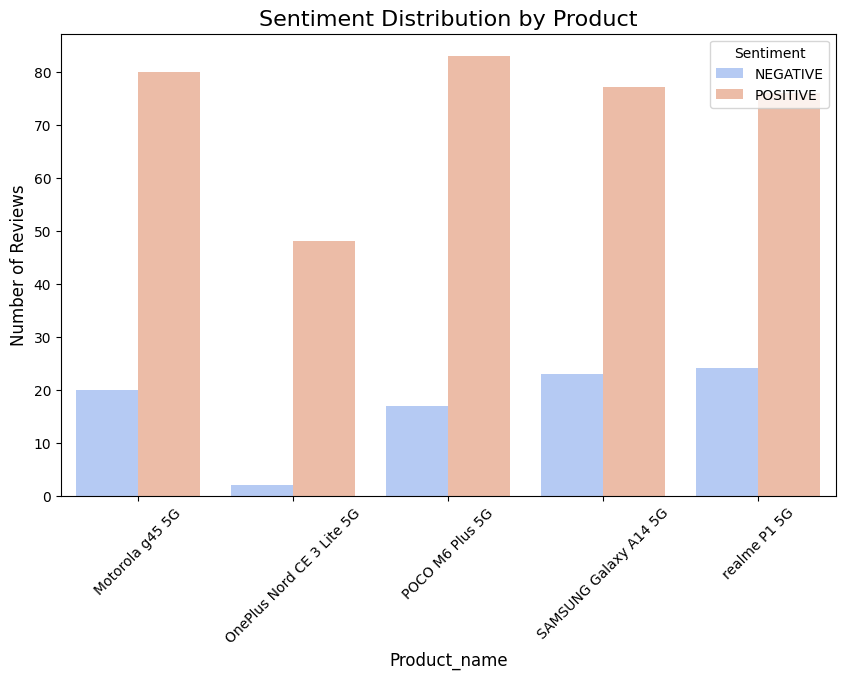

In [ ]:
plt.figure(figsize=(10, 6))
# Group by 'Product Name' and 'predicted_sentiment' (which represents sentiment)
sentiment_by_product = df.groupby(['Product_name', 'predicted_sentiment']).size().reset_index(name='count')
# Create the barplot using 'Product Name' for the x-axis and 'count' for y-axis
sns.barplot(x='Product_name', y='count', hue='predicted_sentiment', data=sentiment_by_product, palette='coolwarm')
# Adding title and labels
plt.title('Sentiment Distribution by Product', fontsize=16)
plt.xlabel('Product_name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.legend(title='Sentiment') # Add legend for sentiment
plt.show()  # Display the plot

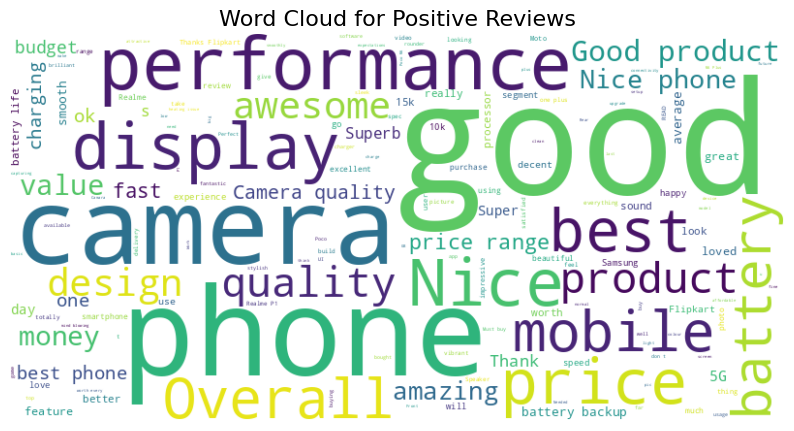

In [ ]:
# Word Cloud for Positive Reviews
from wordcloud import WordCloud
positive_reviews = ' '.join(df[df['predicted_sentiment'] == 'POSITIVE']['Review Text'].tolist())  # Combine all positive reviews
# Generate the word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.axis('off')
plt.show()

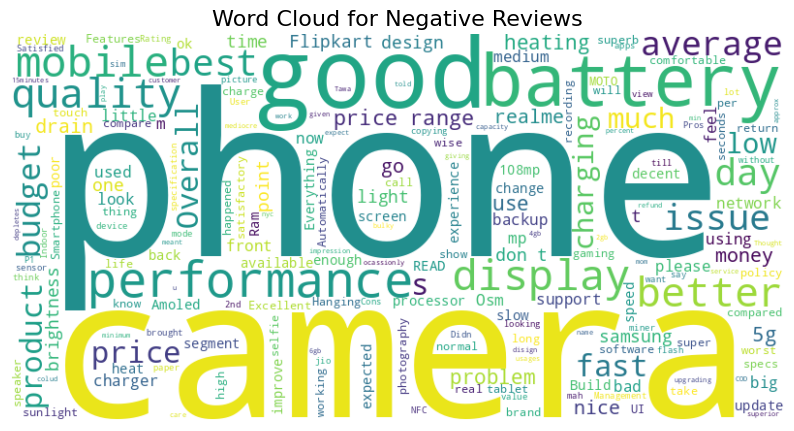

In [ ]:
# Word Cloud for Negative Reviews (if you have negative sentiment data)
negative_reviews = ' '.join(df[df['predicted_sentiment'] == 'NEGATIVE']['Review Text'].tolist())

# Generate the word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.axis('off')
plt.show()

# **AWS [World wide anyone can use this URL]**